In [ ]:
# ..... visualize sankey plots for within-stage data ..... #

In [4]:
library(data.table)
library(dplyr)
library(networkD3)
library(htmlwidgets)
library(randomcoloR)

In [20]:
# top hits > 0.9
df1 = read.delim('stage23_stage28_links.csv', sep = ',')
colnames(df1) = NULL
ids = grep('stage23', df1[,2])
df1[ids,] <- df1[ids,c(2,1,3,4)]   # re-arrange rows 
colnames(df1) <- c('celltype1', 'celltype2', 'auroc', 'match_type')

df2 = read.delim('stage28_stage32_links.csv', sep = ',')
colnames(df2) = NULL
ids = grep('stage28', df2[,2])
df2[ids,] <- df2[ids,c(2,1,3,4)]   # re-arrange rows 
colnames(df2) <- c('celltype1', 'celltype2', 'auroc', 'match_type')

newdf = rbind(df1, df2)

newdf$stage1 = sub('\\|.*', '', newdf[,1])
newdf$stage2 = sub('\\|.*', '', newdf[,2])
newdf$cell1 = sub('.*\\|', '', newdf$celltype1)
newdf$cell2 = sub('.*\\|', '', newdf$celltype2)
newdf <- newdf[which(newdf$stage1!=newdf$stage2),]
dim(newdf)
newdf[1,]

[1] 118   8

celltype1             celltype2                auroc match_type        
1 stage23|Macrophages_1 stage28|Cardiomyocytes_4 1     Reciprocal_top_hit
  stage1  stage2  cell1         cell2           
1 stage23 stage28 Macrophages_1 Cardiomyocytes_4

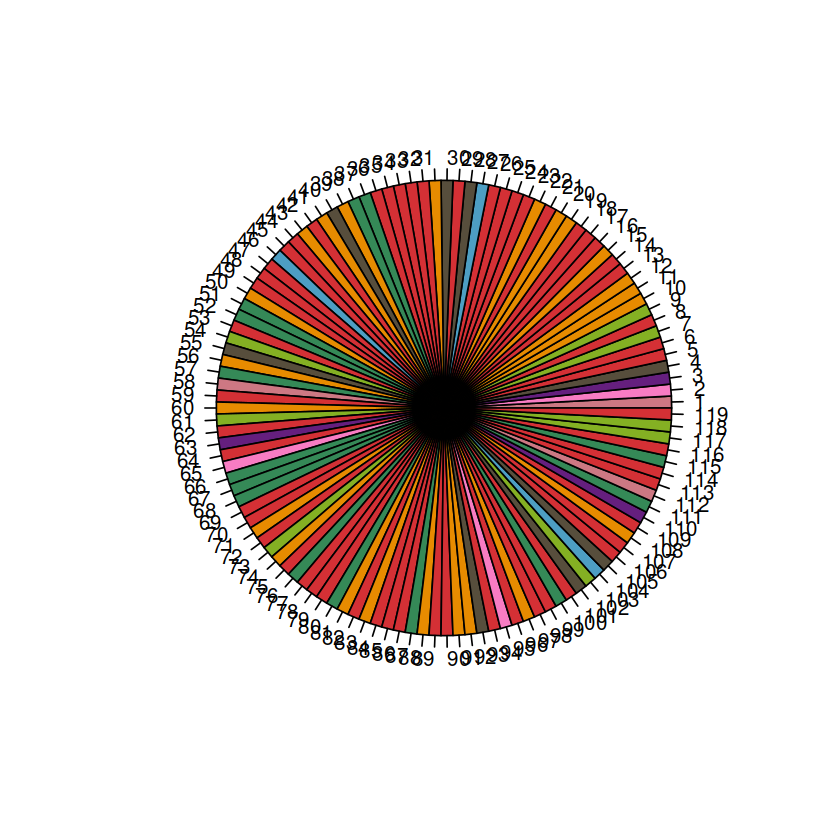

In [21]:
# get palette for sankey
cells1 = unique(c(unlist(newdf[,1]), unlist(newdf[,2])))
# palette <- distinctColorPalette(length(cells1))
# palette

ctypes = sub('\\_.*', '', sub('.*\\|', '', cells1))

subs2 = c('Endocardial cells', 'Erythrocytes', 'Cardiomyocytes', 'Valve cells',  
          'Macrophages', 'Dendritic cells', 'Fibroblast cells',
          'Endothelial cells', 'Epithelial cells', 'Mural cells')
subcol2 = c('#574e3c', '#f87cc3', '#d43035', '#e78b00',  
            '#cd7883', '#651f7e', '#358957',
            '#4d9ec3', '#84b023', '#4900e6')
palette = subcol2[match(ctypes, subs2)]

pie(rep(1, length(cells1)), col=palette)

In [24]:
# A connection data frame is a list of flows with intensity for each flow
links = data.frame(source = unlist(newdf[,1]), target = unlist(newdf[,2]),
                   value = unlist(newdf[,3]))

In [25]:
## sankey diagram
 
# From these flows we need to create a node data frame: it lists every entities involved in the flow
nodes <- data.frame(
  name=c(as.character(links$source), 
  as.character(links$target)) %>% unique()
)
 
# With networkD3, connection must be provided using id, not using real name like in the links dataframe.. So we need to reformat it.
links$IDsource <- match(links$source, nodes$name)-1 
links$IDtarget <- match(links$target, nodes$name)-1
 
# prepare color scale: I give one specific color for each node.
col1 = paste(rep(palette,2), collapse="','")
nod1 = paste(c(newdf$celltype1, newdf$celltype2), collapse="','")
my_color <- paste0("d3.scaleOrdinal() .domain(['", nod1, "']) .range(['", col1, "'])")
 
# Make the Network
p <- sankeyNetwork(Links = links, Nodes = nodes,
              Source = "IDsource", Target = "IDtarget",
              Value = "value", NodeID = "name", colourScale=my_color, sinksRight=FALSE)
p

HTML widgets cannot be represented in plain text (need html)

In [28]:
saveWidget(p, file="stages3_cluster_sankey.html")

# library(webshot)
# webshot("stages3_cluster_sankey.html", "stages3_cluster_sankey.pdf")